In [1]:
from WD.datasets import Conditional_Dataset_Zarr
import numpy as np
import torch
import zarr
import torch
from torch.utils.data import Sampler, RandomSampler, BatchSampler, SequentialSampler
import dask

# Test zarr read speads.

In [6]:


z = zarr.open("/home/wider/Projects/diffusion-models-for-weather-prediction/test_zarr/test.zarr",  mode='w', shape=(1e5, 1e4), chunks=(10000, 10000), compressor=None)

z[:] = 0

In [9]:
a = zarr.open("/home/wider/Projects/diffusion-models-for-weather-prediction/test_zarr/test.zarr",  mode='r')

In [15]:
a.oindex[0:10,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
b = zarr.open("/data/compoundx/WeatherDiff/model_input/079A9C_train.zarr/",  mode='r')

In [7]:
z1 = zarr.open("/home/wider/Projects/diffusion-models-for-weather-prediction/test_zarr/test2.zarr",  mode='w', shape=(54049, 5, 32, 64), chunks=(54049, 5, 32, 64), compressor=None)
z2 = zarr.open("/home/wider/Projects/diffusion-models-for-weather-prediction/test_zarr/test3.zarr",  mode='w', shape=(54049, 5, 32, 64), chunks=(1, 5, 32, 64), compressor=None)

In [9]:
z1[:,:,:,:] = b.inputs.data[:,:,:,:]

In [10]:
z2[:,:,:,:] = b.inputs.data[:,:,:,:]

In [41]:
z1[:,:,:,:] = b.inputs.data[:,:,:,:]
z1[:,:,:,:] = b.inputs.data[:,:,:,:]

KeyboardInterrupt: 

In [11]:
test2 = zarr.open("/home/wider/Projects/diffusion-models-for-weather-prediction/test_zarr/test2.zarr",  mode='r')
test3 = zarr.open("/home/wider/Projects/diffusion-models-for-weather-prediction/test_zarr/test3.zarr",  mode='r')

In [19]:
# load entire chunk
a = test2[:,:,:,:]

for i in range(len(a)):
    # access elements one time step at a time
    a[i,...]

In [21]:
# open one chunk at a time
for i in range(test3.shape[0]):
    # access elements one time step at a time
    test3[i, :, :, :]

In [3]:
from WD.io import load_config
import numpy as np

In [3]:
z = zarr.open("/data/compoundx/WeatherDiff/model_input/590781_train.zarr/")

In [8]:
import matplotlib.pyplot as plt

In [22]:
d = z.constants.data[:,:,:]

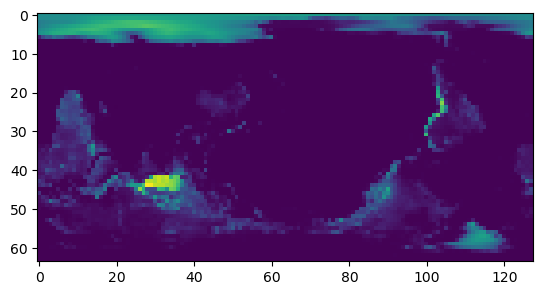

In [26]:
plt.imshow(d[0])

In [25]:
z.constants.data

<zarr.core.Array '/constants/data' (1, 64, 128) float64>

In [5]:
from omegaconf import DictConfig

In [8]:
c = DictConfig(
        {"patch_size": (4,4),
         "embed_dim": 256,
         "num_blocks": 16
         }
)